<a href="https://colab.research.google.com/github/kursatkara/MAE_5020_S24/blob/master/03_71_Randomized_SVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Randomized SVD**

The code from the textbook [1] was modified to run on Google Colab.

[1] https://github.com/kursatkara/databook_python/blob/master/CH01/CH01_SEC08_RSVD.ipynb

In [1]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np

plt.rcParams.update({'font.size': 12})

# Define randomized SVD function
def rSVD(X,r,q,p):
    # Step 1: Sample column space of X with P matrix
    ny = X.shape[1]
    P = np.random.randn(ny,r+p)
    Z = X @ P
    for k in range(q):
        Z = X @ (X.T @ Z)

    Q, R = np.linalg.qr(Z,mode='reduced')

    # Step 2: Compute SVD on projected Y = Q.T @ X
    Y = Q.T @ X
    UY, S, VT = np.linalg.svd(Y,full_matrices=0)
    U = Q @ UY

    return U, S, VT

In [2]:
# Import the v2 API explicitly
import imageio.v2 as imageio

# Direct URL of the image
image_url = 'https://github.com/kursatkara/MAE_5020_S24/raw/master/Data/jupiter.jpg'

# Reading the image directly from the URL using the v2 API
A = imageio.imread(image_url)

X = np.mean(A,axis=2) # Convert RGB -> grayscale


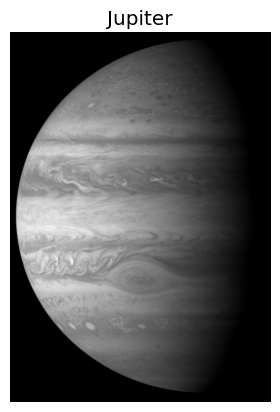

(3207, 2260) 7247820


In [3]:
# Plot the grayscale image
plt.imshow(X, cmap='gray')
plt.axis('off')
plt.title('Jupiter')
plt.show()
print(X.shape, X.size)

In [4]:
# Deterministic SVD
U, S, VT = np.linalg.svd(X,full_matrices=0)


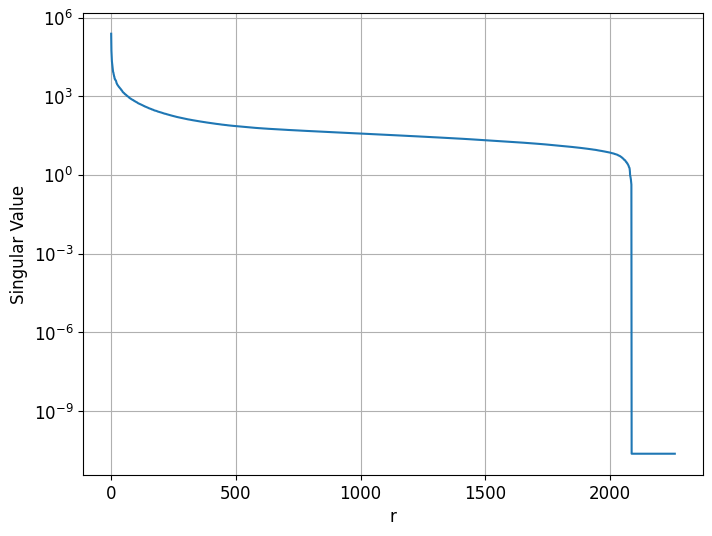

In [18]:
plt.rcParams['figure.figsize'] = [8,6]
plt.semilogy(S)
plt.xlabel('r')
plt.ylabel('Singular Value')
plt.grid()
plt.show()

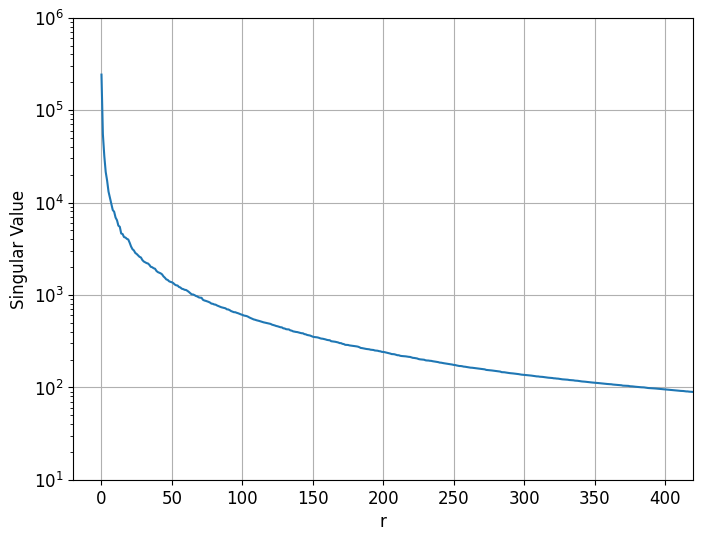

In [17]:
plt.rcParams['figure.figsize'] = [8,6]
plt.semilogy(S)
plt.xlabel('r')
plt.ylabel('Singular Value')
plt.xlim(-20,420)
plt.ylim(1e1,1e6)
plt.grid()
plt.show()

In [19]:
## Reconstruction using the regular SVD
r = 400 # Target rank

XSVD = U[:,:(r+1)] @ np.diag(S[:(r+1)]) @ VT[:(r+1),:] # SVD approximation
errXSVD = np.linalg.norm(X-XSVD,ord=2) / np.linalg.norm(X,ord=2)
print(errXSVD)

0.00039007051775193704


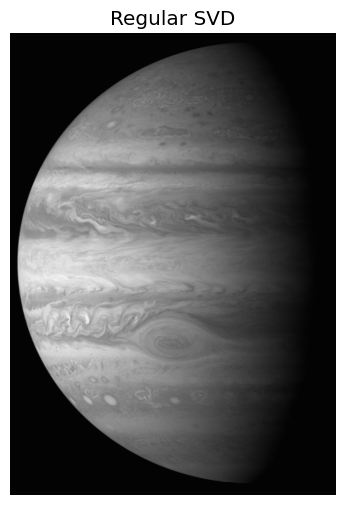

(3207, 2260) 7247820


In [20]:
# Plot the reconstruction using the regular SVD
plt.imshow(XSVD, cmap='gray')
plt.axis('off')
plt.title('Regular SVD')
plt.show()
print(XSVD.shape, XSVD.size)

In [21]:
# Randomized SVD
r = 400 # Target rank
q = 1   # Power iterations
p = 5   # Oversampling parameter

rU, rS, rVT = rSVD(X,r,q,p)

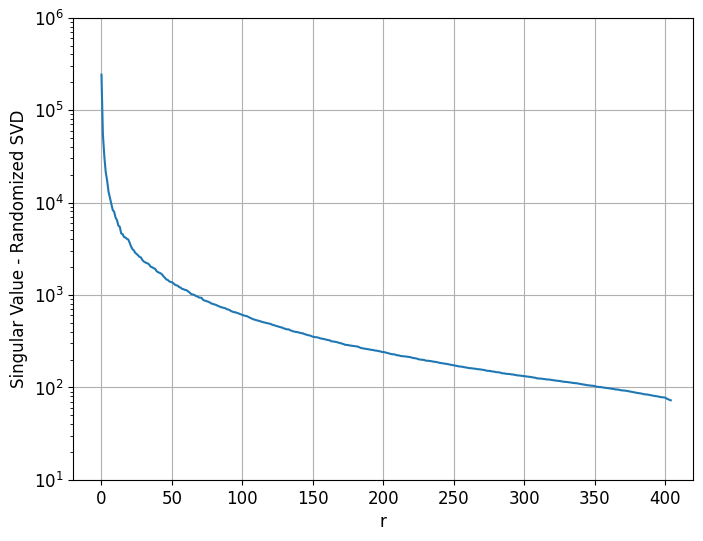

In [22]:
plt.rcParams['figure.figsize'] = [8,6]
plt.semilogy(rS)
plt.xlabel('r')
plt.ylabel('Singular Value - Randomized SVD')
plt.xlim(-20,420)
plt.ylim(1e1,1e6)
plt.grid()
plt.show()

In [9]:
## Reconstruction
XrSVD = rU[:,:(r+1)] @ np.diag(rS[:(r+1)]) @ rVT[:(r+1),:] # SVD approximation
errXrSVD = np.linalg.norm(X-XrSVD,ord=2) / np.linalg.norm(X,ord=2)
print(errXrSVD)

0.0005159198830481504


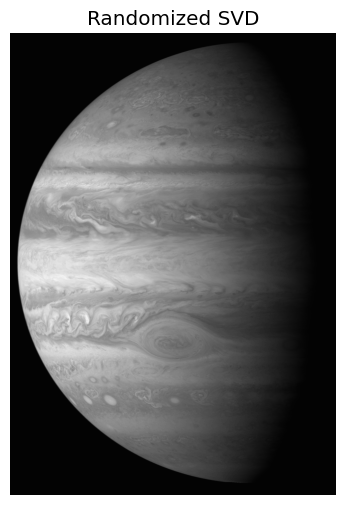

(3207, 2260) 7247820


In [23]:
# Plot the reconstruction using the randomized SVD
plt.imshow(XrSVD, cmap='gray')
plt.axis('off')
plt.title('Randomized SVD')
plt.show()
print(XrSVD.shape, XrSVD.size)

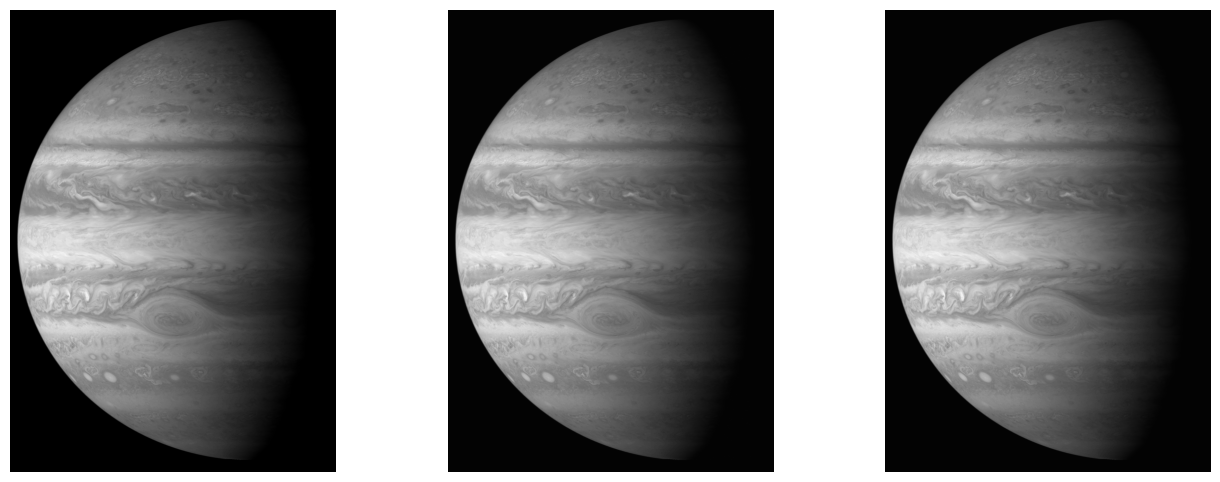

In [24]:
## Plot
plt.rcParams['figure.figsize'] = [16,6]
fig, axs = plt.subplots(1,3)

plt.set_cmap('gray')
axs[0].imshow(X)
axs[0].axis('off')
axs[1].imshow(XSVD)
axs[1].axis('off')
axs[2].imshow(XrSVD)
axs[2].axis('off')

plt.show()

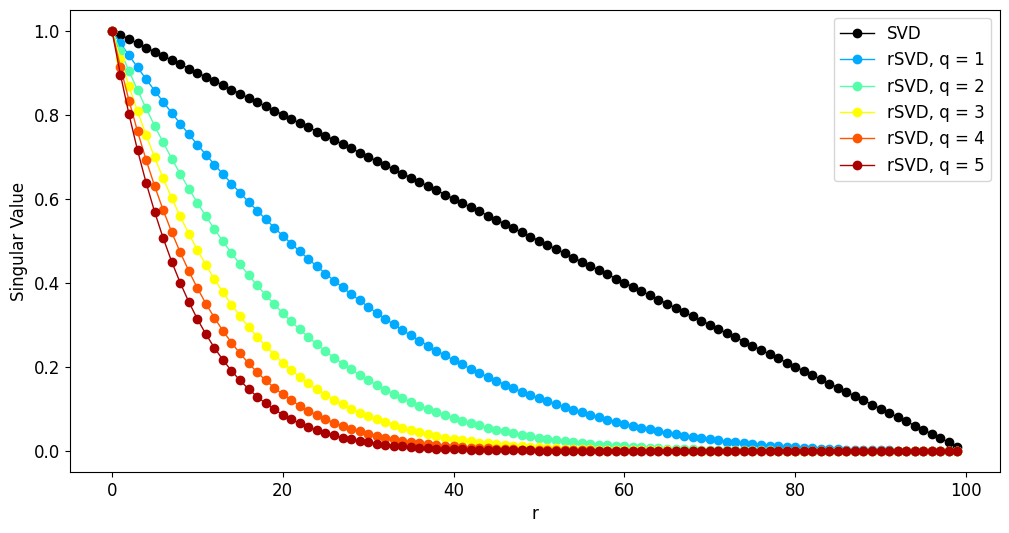

In [29]:
plt.rcParams['figure.figsize'] = [12,6]

## Illustrate power iterations
X = np.random.randn(1000,100)
U, S, VT = np.linalg.svd(X,full_matrices=0)
S = np.arange(1,0,-0.01)
X = U @ np.diag(S) @ VT

# Define color map
color_list = np.array(
                 [[0,0,2/3],
                 [0,0,1],
                 [0,1/3,1],
                 [0,2/3,1],
                 [0,1,1],
                 [1/3,1,2/3],
                 [2/3,1,1/3],
                 [1,1,0],
                 [1,2/3,0],
                 [1,1/3,0],
                 [1,0,0],
                 [2/3,0,0]])

plt.plot(S,'o-',color='k',linewidth=1,label='SVD')

Y = X
for q in range(1,6):
    Y = X.T @ Y
    Y = X @ Y
    Uq, Sq, VTq = np.linalg.svd(Y,full_matrices=0)
    plt.plot(Sq,'-o',color=tuple(color_list[2*q+1]),linewidth=1,label='rSVD, q = '+str(q))

plt.xlabel('r')
plt.ylabel('Singular Value')

plt.legend()
plt.show()